In [2]:
import pandas as pd

In [3]:
train = pd.read_csv('./goodreads_train.csv')
test = pd.read_csv('./goodreads_test.csv')

In [4]:
train.head()

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,8842281e1d1347389f2ab93d60773d4d,18245960,dfdbb7b0eb5a7e4c26d59a937e2e5feb,5,This is a special book. It started slow for ab...,Sun Jul 30 07:44:10 -0700 2017,Wed Aug 30 00:00:26 -0700 2017,Sat Aug 26 12:05:52 -0700 2017,Tue Aug 15 13:23:18 -0700 2017,28,1
1,8842281e1d1347389f2ab93d60773d4d,16981,a5d2c3628987712d0e05c4f90798eb67,3,Recommended by Don Katz. Avail for free in Dec...,Mon Dec 05 10:46:44 -0800 2016,Wed Mar 22 11:37:04 -0700 2017,NaN,NaN,1,0
2,8842281e1d1347389f2ab93d60773d4d,28684704,2ede853b14dc4583f96cf5d120af636f,3,"A fun, fast paced science fiction thriller. I ...",Tue Nov 15 11:29:22 -0800 2016,Mon Mar 20 23:40:27 -0700 2017,Sat Mar 18 23:22:42 -0700 2017,Fri Mar 17 23:45:40 -0700 2017,22,0
3,8842281e1d1347389f2ab93d60773d4d,27161156,ced5675e55cd9d38a524743f5c40996e,0,Recommended reading to understand what is goin...,Wed Nov 09 17:37:04 -0800 2016,Wed Nov 09 17:38:20 -0800 2016,NaN,NaN,5,1
4,8842281e1d1347389f2ab93d60773d4d,25884323,332732725863131279a8e345b63ac33e,4,"I really enjoyed this book, and there is a lot...",Mon Apr 25 09:31:23 -0700 2016,Mon Apr 25 09:31:23 -0700 2016,Sun Jun 26 00:00:00 -0700 2016,Sat May 28 00:00:00 -0700 2016,9,1


In [5]:
train.describe()

,book_id,rating,n_votes,n_comments
count,9.000000e+05,900000.000000,900000.000000,900000.000000
mean,1.344145e+07,3.689639,3.294381,1.016656
std,9.357863e+06,1.252583,17.873553,5.963821
min,1.000000e+00,0.000000,-3.000000,-1.000000
25%,6.340471e+06,3.000000,0.000000,0.000000
50%,1.344203e+07,4.000000,0.000000,0.000000
75%,2.057897e+07,5.000000,2.000000,0.000000
max,3.632868e+07,5.000000,3222.000000,1335.000000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900000 entries, 0 to 899999
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       900000 non-null  object
 1   book_id       900000 non-null  int64 
 2   review_id     900000 non-null  object
 3   rating        900000 non-null  int64 
 4   review_text   900000 non-null  object
 5   date_added    900000 non-null  object
 6   date_updated  900000 non-null  object
 7   read_at       808234 non-null  object
 8   started_at    625703 non-null  object
 9   n_votes       900000 non-null  int64 
 10  n_comments    900000 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 75.5+ MB


In [7]:
len(train['book_id'].unique())

25474

In [8]:
train[['book_id','rating']].groupby(train['book_id']).mean()

,book_id,rating
book_id,,
1,1.0,4.571795
2,2.0,4.424390
3,3.0,4.521862
5,5.0,4.652083
6,6.0,4.587444
...,...,...
36196052,36196052.0,4.500000
36242916,36242916.0,3.000000
36252773,36252773.0,4.000000


In [9]:
train[['n_votes','rating']].groupby(train['n_votes']).mean()

,n_votes,rating
n_votes,,
-3,-3.0,5.000000
-2,-2.0,3.500000
-1,-1.0,4.078947
0,0.0,3.628420
1,1.0,3.754596
...,...,...
2252,2252.0,1.000000
2333,2333.0,4.000000
2549,2549.0,1.000000


In [10]:
import seaborn as sns

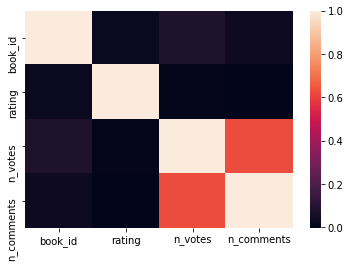

In [11]:
sns.heatmap(train.corr())

In [12]:
#Sun Jul 30 07:44:10 -0700 2017
def seperate_date(DataFrame):
    month = []
    day = []
    time = []
    year = []
    for i in DataFrame['date_added']:
        _,m,d,t,_,y = i.split()
        month.append(m)
        day.append(d)
        time.append(t)
        year.append(y)
    return month,day,time,year

mon,da,tim,ye = seperate_date(train)
train['add_month'] = mon
train['add_day'] = da
train['add_time'] = tim
train['add_year'] = ye

In [13]:
def updated_seperate_date(DataFrame):
    month = []
    day = []
    time = []
    year = []
    for i in DataFrame['date_updated']:
        _,m,d,t,_,y = i.split()
        month.append(m)
        day.append(d)
        time.append(t)
        year.append(y)
    return month,day,time,year

mon,da,tim,ye = updated_seperate_date(train)
train['up_month'] = mon
train['up_day'] = da
train['up_time'] = tim
train['up_year'] = ye

In [14]:
train

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments,add_month,add_day,add_time,add_year,up_month,up_day,up_time,up_year
0,8842281e1d1347389f2ab93d60773d4d,18245960,dfdbb7b0eb5a7e4c26d59a937e2e5feb,5,This is a special book. It started slow for ab...,Sun Jul 30 07:44:10 -0700 2017,Wed Aug 30 00:00:26 -0700 2017,Sat Aug 26 12:05:52 -0700 2017,Tue Aug 15 13:23:18 -0700 2017,28,1,Jul,30,07:44:10,2017,Aug,30,00:00:26,2017
1,8842281e1d1347389f2ab93d60773d4d,16981,a5d2c3628987712d0e05c4f90798eb67,3,Recommended by Don Katz. Avail for free in Dec...,Mon Dec 05 10:46:44 -0800 2016,Wed Mar 22 11:37:04 -0700 2017,NaN,NaN,1,0,Dec,05,10:46:44,2016,Mar,22,11:37:04,2017
2,8842281e1d1347389f2ab93d60773d4d,28684704,2ede853b14dc4583f96cf5d120af636f,3,"A fun, fast paced science fiction thriller. I ...",Tue Nov 15 11:29:22 -0800 2016,Mon Mar 20 23:40:27 -0700 2017,Sat Mar 18 23:22:42 -0700 2017,Fri Mar 17 23:45:40 -0700 2017,22,0,Nov,15,11:29:22,2016,Mar,20,23:40:27,2017
3,8842281e1d1347389f2ab93d60773d4d,27161156,ced5675e55cd9d38a524743f5c40996e,0,Recommended reading to understand what is goin...,Wed Nov 09 17:37:04 -0800 2016,Wed Nov 09 17:38:20 -0800 2016,NaN,NaN,5,1,Nov,09,17:37:04,2016,Nov,09,17:38:20,2016
4,8842281e1d1347389f2ab93d60773d4d,25884323,332732725863131279a8e345b63ac33e,4,"I really enjoyed this book, and there is a lot...",Mon Apr 25 09:31:23 -0700 2016,Mon Apr 25 09:31:23 -0700 2016,Sun Jun 26 00:00:00 -0700 2016,Sat May 28 00:00:00 -0700 2016,9,1,Apr,25,09:31:23,2016,Apr,25,09:31:23,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899995,b9450d1c1f97f891c392b1105959b56e,11832081,7c34c15ad8cb28a4afca32946e2016ea,3,3.5 stars. \n Jenna is a popular YA author and...,Fri Nov 16 22:10:17 -0800 2012,Sat Nov 17 22:42:44 -0800 2012,Sat Nov 17 00:00:00 -0800 2012,Fri Nov 16 00:00:00 -0800 2012,0,0,Nov,16,22:10:17,2012,Nov,17,22:42:44,2012
899996,b9450d1c1f97f891c392b1105959b56e,16095092,e979c735276431915d089cfaf446d64f,3,This was a quick read for me. I have read a lo...,Fri Nov 16 22:09:49 -0800 2012,Sat Nov 17 23:38:58 -0800 2012,Sat Nov 17 00:00:00 -0800 2012,Fri Nov 16 00:00:00 -0800 2012,1,1,Nov,16,22:09:49,2012,Nov,17,23:38:58,2012
899997,b9450d1c1f97f891c392b1105959b56e,8430896,feb9fe6439f9fbba8a1cce36020ad977,4,** spoiler alert ** \n 3.5 stars. \n This book...,Tue Nov 13 05:38:24 -0800 2012,Tue Nov 13 23:29:17 -0800 2012,Tue Nov 13 00:00:00 -0800 2012,Tue Nov 13 00:00:00 -0800 2012,1,0,Nov,13,05:38:24,2012,Nov,13,23:29:17,2012
899998,b9450d1c1f97f891c392b1105959b56e,12275680,741e29369f70531bfffbd02add86f228,4,** spoiler alert ** \n Another fun read from M...,Mon Nov 12 05:42:30 -0800 2012,Tue Nov 13 22:32:05 -0800 2012,Tue Nov 13 00:00:00 -0800 2012,Mon Nov 12 00:00:00 -0800 2012,0,0,Nov,12,05:42:30,2012,Nov,13,22:32:05,2012


In [18]:
train = train.dropna()

In [19]:
train

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,...,add_time,add_year,up_month,up_day,up_time,up_year,read_month,read_day,read_time,read_year
0,8842281e1d1347389f2ab93d60773d4d,18245960,dfdbb7b0eb5a7e4c26d59a937e2e5feb,5,This is a special book. It started slow for ab...,Sun Jul 30 07:44:10 -0700 2017,Wed Aug 30 00:00:26 -0700 2017,Sat Aug 26 12:05:52 -0700 2017,Tue Aug 15 13:23:18 -0700 2017,28,...,07:44:10,2017,Aug,30,00:00:26,2017,Jul,30,07:44:10,2017
2,8842281e1d1347389f2ab93d60773d4d,28684704,2ede853b14dc4583f96cf5d120af636f,3,"A fun, fast paced science fiction thriller. I ...",Tue Nov 15 11:29:22 -0800 2016,Mon Mar 20 23:40:27 -0700 2017,Sat Mar 18 23:22:42 -0700 2017,Fri Mar 17 23:45:40 -0700 2017,22,...,11:29:22,2016,Mar,20,23:40:27,2017,Nov,15,11:29:22,2016
4,8842281e1d1347389f2ab93d60773d4d,25884323,332732725863131279a8e345b63ac33e,4,"I really enjoyed this book, and there is a lot...",Mon Apr 25 09:31:23 -0700 2016,Mon Apr 25 09:31:23 -0700 2016,Sun Jun 26 00:00:00 -0700 2016,Sat May 28 00:00:00 -0700 2016,9,...,09:31:23,2016,Apr,25,09:31:23,2016,Apr,25,09:31:23,2016
5,8842281e1d1347389f2ab93d60773d4d,19398490,ea4a220b10e6b5c796dae0e3b970aff1,4,A beautiful story. It is rare to encounter a b...,Sun Jan 03 21:20:46 -0800 2016,Tue Sep 20 23:30:15 -0700 2016,Tue Sep 13 11:51:51 -0700 2016,Sat Aug 20 07:03:03 -0700 2016,35,...,21:20:46,2016,Sep,20,23:30:15,2016,Jan,03,21:20:46,2016
6,8842281e1d1347389f2ab93d60773d4d,22318578,5fe9882bfe4b0520a322820c4c55747d,5,5 stars for giving me a better framework for h...,Sun Jun 07 12:50:13 -0700 2015,Wed Mar 22 11:36:58 -0700 2017,Sun Aug 09 00:00:00 -0700 2015,Sun Jun 07 00:00:00 -0700 2015,24,...,12:50:13,2015,Mar,22,11:36:58,2017,Jun,07,12:50:13,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899995,b9450d1c1f97f891c392b1105959b56e,11832081,7c34c15ad8cb28a4afca32946e2016ea,3,3.5 stars. \n Jenna is a popular YA author and...,Fri Nov 16 22:10:17 -0800 2012,Sat Nov 17 22:42:44 -0800 2012,Sat Nov 17 00:00:00 -0800 2012,Fri Nov 16 00:00:00 -0800 2012,0,...,22:10:17,2012,Nov,17,22:42:44,2012,Nov,16,22:10:17,2012
899996,b9450d1c1f97f891c392b1105959b56e,16095092,e979c735276431915d089cfaf446d64f,3,This was a quick read for me. I have read a lo...,Fri Nov 16 22:09:49 -0800 2012,Sat Nov 17 23:38:58 -0800 2012,Sat Nov 17 00:00:00 -0800 2012,Fri Nov 16 00:00:00 -0800 2012,1,...,22:09:49,2012,Nov,17,23:38:58,2012,Nov,16,22:09:49,2012
899997,b9450d1c1f97f891c392b1105959b56e,8430896,feb9fe6439f9fbba8a1cce36020ad977,4,** spoiler alert ** \n 3.5 stars. \n This book...,Tue Nov 13 05:38:24 -0800 2012,Tue Nov 13 23:29:17 -0800 2012,Tue Nov 13 00:00:00 -0800 2012,Tue Nov 13 00:00:00 -0800 2012,1,...,05:38:24,2012,Nov,13,23:29:17,2012,Nov,13,05:38:24,2012
899998,b9450d1c1f97f891c392b1105959b56e,12275680,741e29369f70531bfffbd02add86f228,4,** spoiler alert ** \n Another fun read from M...,Mon Nov 12 05:42:30 -0800 2012,Tue Nov 13 22:32:05 -0800 2012,Tue Nov 13 00:00:00 -0800 2012,Mon Nov 12 00:00:00 -0800 2012,0,...,05:42:30,2012,Nov,13,22:32:05,2012,Nov,12,05:42:30,2012


In [23]:
def read_seperate_date(DataFrame):
    month = []
    day = []
    time = []
    year = []
    for i in DataFrame['read_at']:
        _,m,d,t,_,y = i.split()
        month.append(m)
        day.append(d)
        time.append(t)
        year.append(y)
    return month,day,time,year

mon,da,tim,ye = read_seperate_date(train)
train['read_month'] = mon
train['read_day'] = da
train['read_time'] = tim
train['read_year'] = ye

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


In [24]:
def started_seperate_date(DataFrame):
    month = []
    day = []
    time = []
    year = []
    for i in DataFrame['started_at']:
        _,m,d,t,_,y = i.split()
        month.append(m)
        day.append(d)
        time.append(t)
        year.append(y)
    return month,day,time,year

mon,da,tim,ye = started_seperate_date(train)
train['started_month'] = mon
train['started_day'] = da
train['started_time'] = tim
train['started_year'] = ye

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


In [22]:
train

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,...,up_time,up_year,read_month,read_day,read_time,read_year,started_month,started_day,started_time,started_year
0,8842281e1d1347389f2ab93d60773d4d,18245960,dfdbb7b0eb5a7e4c26d59a937e2e5feb,5,This is a special book. It started slow for ab...,Sun Jul 30 07:44:10 -0700 2017,Wed Aug 30 00:00:26 -0700 2017,Sat Aug 26 12:05:52 -0700 2017,Tue Aug 15 13:23:18 -0700 2017,28,...,00:00:26,2017,Jul,30,07:44:10,2017,Jul,30,07:44:10,2017
2,8842281e1d1347389f2ab93d60773d4d,28684704,2ede853b14dc4583f96cf5d120af636f,3,"A fun, fast paced science fiction thriller. I ...",Tue Nov 15 11:29:22 -0800 2016,Mon Mar 20 23:40:27 -0700 2017,Sat Mar 18 23:22:42 -0700 2017,Fri Mar 17 23:45:40 -0700 2017,22,...,23:40:27,2017,Nov,15,11:29:22,2016,Nov,15,11:29:22,2016
4,8842281e1d1347389f2ab93d60773d4d,25884323,332732725863131279a8e345b63ac33e,4,"I really enjoyed this book, and there is a lot...",Mon Apr 25 09:31:23 -0700 2016,Mon Apr 25 09:31:23 -0700 2016,Sun Jun 26 00:00:00 -0700 2016,Sat May 28 00:00:00 -0700 2016,9,...,09:31:23,2016,Apr,25,09:31:23,2016,Apr,25,09:31:23,2016
5,8842281e1d1347389f2ab93d60773d4d,19398490,ea4a220b10e6b5c796dae0e3b970aff1,4,A beautiful story. It is rare to encounter a b...,Sun Jan 03 21:20:46 -0800 2016,Tue Sep 20 23:30:15 -0700 2016,Tue Sep 13 11:51:51 -0700 2016,Sat Aug 20 07:03:03 -0700 2016,35,...,23:30:15,2016,Jan,03,21:20:46,2016,Jan,03,21:20:46,2016
6,8842281e1d1347389f2ab93d60773d4d,22318578,5fe9882bfe4b0520a322820c4c55747d,5,5 stars for giving me a better framework for h...,Sun Jun 07 12:50:13 -0700 2015,Wed Mar 22 11:36:58 -0700 2017,Sun Aug 09 00:00:00 -0700 2015,Sun Jun 07 00:00:00 -0700 2015,24,...,11:36:58,2017,Jun,07,12:50:13,2015,Jun,07,12:50:13,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899995,b9450d1c1f97f891c392b1105959b56e,11832081,7c34c15ad8cb28a4afca32946e2016ea,3,3.5 stars. \n Jenna is a popular YA author and...,Fri Nov 16 22:10:17 -0800 2012,Sat Nov 17 22:42:44 -0800 2012,Sat Nov 17 00:00:00 -0800 2012,Fri Nov 16 00:00:00 -0800 2012,0,...,22:42:44,2012,Nov,16,22:10:17,2012,Nov,16,22:10:17,2012
899996,b9450d1c1f97f891c392b1105959b56e,16095092,e979c735276431915d089cfaf446d64f,3,This was a quick read for me. I have read a lo...,Fri Nov 16 22:09:49 -0800 2012,Sat Nov 17 23:38:58 -0800 2012,Sat Nov 17 00:00:00 -0800 2012,Fri Nov 16 00:00:00 -0800 2012,1,...,23:38:58,2012,Nov,16,22:09:49,2012,Nov,16,22:09:49,2012
899997,b9450d1c1f97f891c392b1105959b56e,8430896,feb9fe6439f9fbba8a1cce36020ad977,4,** spoiler alert ** \n 3.5 stars. \n This book...,Tue Nov 13 05:38:24 -0800 2012,Tue Nov 13 23:29:17 -0800 2012,Tue Nov 13 00:00:00 -0800 2012,Tue Nov 13 00:00:00 -0800 2012,1,...,23:29:17,2012,Nov,13,05:38:24,2012,Nov,13,05:38:24,2012
899998,b9450d1c1f97f891c392b1105959b56e,12275680,741e29369f70531bfffbd02add86f228,4,** spoiler alert ** \n Another fun read from M...,Mon Nov 12 05:42:30 -0800 2012,Tue Nov 13 22:32:05 -0800 2012,Tue Nov 13 00:00:00 -0800 2012,Mon Nov 12 00:00:00 -0800 2012,0,...,22:32:05,2012,Nov,12,05:42:30,2012,Nov,12,05:42:30,2012
